<a href="https://colab.research.google.com/github/Gh6if84vi/DataScience-Learning-/blob/main/Pivot_Table().ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pivot Table**
The pivot table takes simple column-wise data as input and groups the entires into a two-dimensional table that provides a multidimensional summarization of the data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.groupby('sex')['total_bill'].mean()

<ipython-input-4-501f925a1efb>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')['total_bill'].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


In [5]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

<ipython-input-5-19160ad1a132>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [6]:
df.pivot_table(index='sex',columns='smoker',values='total_bill')

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [7]:
#Above two cells shows us the impact of "PIVOT_TABLE" by eventually reducing the
# amount of code to be written

In [8]:
#agg parameter-mean(default)
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='std')

smoker,Yes,No
sex,,
Male,9.911845,8.726566
Female,9.189751,7.286455


In [9]:
df.pivot_table(index='sex',values='total_bill')

,total_bill
sex,
Male,20.744076
Female,18.056897


In [10]:
#multidimensional(passing aggfunc as a dictionary)
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'min','tip':'max','total_bill':'sum'})

size                                     tip               \
day            Thur          Fri           Sat    Sun  Thur          Fri   
time          Lunch Dinner Lunch Dinner Dinner Dinner Lunch Dinner Lunch   
sex    smoker                                                              
Male   Yes      2.0    NaN   1.0    2.0    2.0    2.0  5.00    NaN  2.20   
       No       2.0    NaN   NaN    2.0    2.0    2.0  6.70    NaN   NaN   
Female Yes      2.0    NaN   2.0    2.0    1.0    2.0  5.00    NaN  3.48   
       No       1.0    2.0   3.0    2.0    1.0    2.0  5.17    3.0  3.00   

                                   total_bill                              \
day                     Sat    Sun       Thur           Fri           Sat   
time          Dinner Dinner Dinner      Lunch Dinner  Lunch  Dinner Lunch   
sex    smoker                                                               
Male   Yes      4.73  10.00    6.5     191.71   0.00  34.16  129.46   0.0   
       No       3.50   9.00    6.0     369.73   0.00   0.00   34.95   0.0   
Female Yes      4.30   6.50    4.0     134.53   0.00  39.78   48.80   0.0   
       No       3.25   4.67    5.2     381.58  18.78  15.98   22.75   0.0   

                                     
day                     Sun          
time           Dinner Lunch  Dinner  
sex    smoker                        
Male   Yes     589.62   0.0  392.12  
       No      637.73   0.0  877.34  
Female Yes     304.00   0.0   66.16  
       No      247.05   0.0  291.54

In [11]:
#margins
#Its used to bcalculate end result
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [12]:
#plotting graphs
df2=pd.read_csv('/content/expense_data.csv')

In [13]:
df2.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [14]:
df2['Category'].value_counts()

,count
Category,
Food,156
Other,60
Transportation,31
Apparel,7
Household,6
Allowance,6
Social Life,5
Education,1
Salary,1


In [15]:
#From the above dataset,our task is to get month name from date columns
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [16]:
#converting Date(object type)--->Date(datetime type)
df2['Date']=pd.to_datetime(df2['Date'])

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [18]:
#Getting month_name from datetime column
df2['Month']=df2['Date'].dt.month_name()

In [19]:
df2.head()


,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,Month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


In [34]:
#pivot_table from above dataset
df2.pivot_table(index='Month',columns='Category',values='INR',aggfunc='sum',margins=True,fill_value=0)

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation,All
Month,,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,0.0,6440.72,0.0,4800.0,1790.0,0.0,0.0,400.0,513.72,914.0,28644.44
February,0.0,798.0,0.0,0.0,5579.85,0.0,2808.0,20000.0,0.0,0.0,0.0,1800.00,5078.8,36064.65
January,1000.0,0.0,0.0,1400.0,9112.51,0.0,4580.0,13178.0,0.0,8000.0,0.0,200.00,2850.0,40320.51
March,0.0,0.0,0.0,0.0,195.00,0.0,0.0,900.0,0.0,0.0,0.0,0.00,30.0,1125.00
November,2000.0,0.0,0.0,0.0,3174.40,115.0,0.0,2000.0,3.0,0.0,0.0,0.00,331.0,7623.40
All,14000.0,3388.0,196.0,1400.0,24502.48,115.0,12188.0,37868.0,3.0,8000.0,400.0,2513.72,9203.8,113778.00


<Axes: xlabel='Month'>

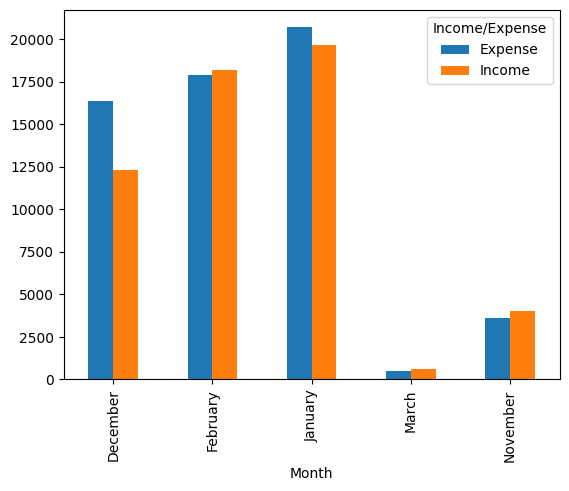

In [32]:

df2.pivot_table(index='Month',columns='Income/Expense',values='INR',aggfunc='sum',fill_value=0).plot(kind='bar',stacked=False)